<h3> <strong> 1. Abstract </strong> </h3>

GoogLeNet의 주요 특징은 network 내부 computing resource 사용 효율이 개선되었다는 것이다. <br>
논문에서는 정교하게 설계된 구조 덕분에 네트워크의 depth와 width를 늘려도 연산량이 유지된다고 한다. <br>
품질을 optimize하기 위해 구조는 **Hebbian principle**과 **multi-scale processing**을 기반으로 두었다고 한다.

* **Hebbian principle** <br>
생물학적인 신경망에서 학습이 이루어지면 특정 입력으로 들어오는 신호 자극에 잘 반응할 수 있도록 시냅스들의 세기가 결정된다. <br>
즉, 학습이란 시냅스 연결의 세기를 조정하는 것이다.

<h3> <strong> 2. Introduction </strong> </h3>

GoogLeNet은 AlexNet에 비해서 약 12배 정도 적은 파라미터를 가지고 있음에도 더 높은 정확도를 보여준다. <br>
논문에서는 이러한 정확도의 이유가 deep-architecture와 classic computer vision의 시너지 덕분이라고 한다. <br>
또한 mobile과 embedded computing의 전력 및 메모리의 효율면에서 영향을 받았으며 추론 시간에 1.5 billion 이하의 곱셈-덧셈 연산 수행하도록 설계되었다. <br>

연구진들은 cv분야에서 효율적인 deep neural network architecture에 초점을 맞췄고 code name은 **Inception**이라고 한다. <br>
이때 'deep'은 두 가지 의미를 가진다.

* 'Inception Module' 안에 있는 새로운 차원 구조 도입
* network의 깊이가 깊어진다는 직접적 의미




<h3> <strong> 3. Introduction </strong> </h3>

LeNet-5를 시작으로 CNN은 전형적으로 표준 구조를 가지고 있었다. - 쌓인 **convolutional layer들 뒤에 하나 혹은 그 이상의 fully-connected layer가 붙는다.** <br> 
이 기본 디자인의 변형들은 image classification 문헌에서 일반적이고 MNIST, CIFAR 그리고 특히 ImageNet 분류 대회에서 지금까지 좋은 결과를 보여줬다. <br>
ImageNet과 같이 더 큰 데이터셋에서의 최근 트렌드는 overfitting 문제 해결을 위해 dropout을 사용하고 layer의 수와 size를 늘리는 것이다.

**max-pooling**은 정확한 공간적 정보 손실을 야기하지만 convolutional network, localization 등 여러 분야에서 성공적으로 사용되었다.

**Network-in-Network**는 신경망의 표현력(representational power of neural network)를 증가시키기 위해 Lin이 제안한 방식이다. <br>
이 방법을 사용하기 위해서는 convolutional layer에 적용될 때, ReLU 함수전에 1×1 convolutional layer를 추가해야 한다. <br>
GoogLeNet에서는 이 방식을 사용한다. <br>
하지만 1×1 convolution들은 두 가지 목적이 있다고 한다.

* 병목 현상을 제거하기 위한 차원 축소
* 네트워크 크기 제한

위 작용들은 depth를 증가시켜 줄 뿐만 아니라 width역시 증가시켜준다. <br>
원리는 아래와 같다.

<h3> <strong> 4. Motivation and High Level Consideration </strong> </h3>

**deep neural network의 성능 개선을 위한 가장 간단한 방법은 이들의 size를 늘리는 것이다.** <br>
각 level의 **depth와 width를 늘리는 것**이 이에 해당한다. <br>
특히 방대한 양의 training data가 주어질 때 이 방식은 더 높은 품질의 모델을 훈련하기 위한 쉽고 안전한 방식이다. <br>
하지만 2가지 문제점이 존재한다.

첫 번째로 더 큰 size는 더 많은 숫자의 파라미터를 의미하며 **overfitting을 하기 쉬운 큰 network를 만든다.** <br> 
ImageNet과 같이 세밀한 범주를 구분해야 하는 경우 고품질의 training data를 만드는 것은 심각한 병목 현상이 될 수 있다.

두 번째로 network의 size를 증가시키는 것은 **computational resource를 증가시킨다.** <br>
computational 예산은 제한되어 있기 때문에 network size를 늘리는 것보다 resource를 효율적으로 분배하는 것이 더 중요하다.

위 두가지 문제를 동시에 해결하는 근본적 방법은 fully-connected 구조를 sparsely connected architecture로 바꾸는 것이다. <br>
아래 그림에서 왼쪽이 sparsely connected, 오른쪽이 fully-connected이다.

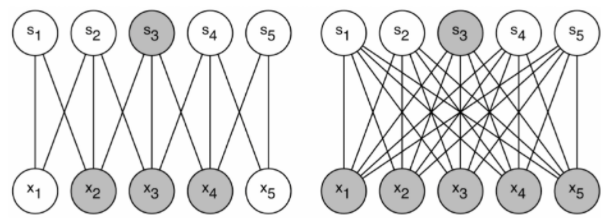



위처럼 관련성(Correlation)이 높은 노드끼리만 연결하는 방법을 Sparsely Connected 라고 한다. <br>
즉 연결을 Sparse 하게 바꿔서 연산량과 파라미터를 줄인다. <br>
이러한 방식은 Overfitting 또한 개선한다고 한다.

하지만 오늘날에 computing 환경에서 균일하지 않은 sparse data 구조를 다루는 것은 비효율적이다. <br>
Dense matrix 연산은 꾸준히 개선되고, 조정된 수치적 라이브러리와 CPU, GPU의 사용으로 빠른 연산이 가능해 졌지만 Sparse model의 발전은 미미했다. <br>

ConvNet은 전통적으로 대칭성을 깨고, 성능을 올리기 위해 random하고 sparse한 connection table을 사용했지만 병렬 처리를 최적화하기 위해 full connection으로 트랜드가 바뀌었다. <br>
또한 규일한 모델 구조와 많은 filter수, 더 큰 배치 사이즈는 효율적인 dense computation이 가능하게 하였다.

이때 연구진들은 full connection과 sparse connection의 중간 단계를 원했던 것? 같다. <br>
이때 **Sparse matrix computation을 다룬 많은 문헌들은 Sparse 매트릭스를 클러스터링하여 상대적으로 Dense 한 Submatrix를 만드는 것을 제안**했고 좋은 성능을 보였다고 한다.

연구진들의 Inception구조는 위에서 말한 Sparse 구조를 시험해보기 위해 시작되었다고 한다. <br>
그리고 learning rate, hyperparmeter 튜닝과 training 방법을 개선한 결과 Localization 및 Object detection 분야에서 특히 좋은 성능을 보였다고 한다.

<h3> <strong> 5. Architectural Details </strong> </h3>

Inception 구조의 주요 아이디어는 **convolutional vision network에서 최적의 local sparse structure를 근사화하고 어떻게 dense components로 구성할 수 있을지를 알아내는 것**이다. <br>
이때, translation invariance를 추정해야 하므로 Inception 구조는 convolutional building block들로 구성된다. <br>
최적의 local construction을 찾기 위해서는 위에서 말한 block을 공간적으로 반복하면 된다. <br>

* **translation invariance**: 이미지의 입력 위치가 변해도 출력은 변하지 않는다는 것을 의미한다.






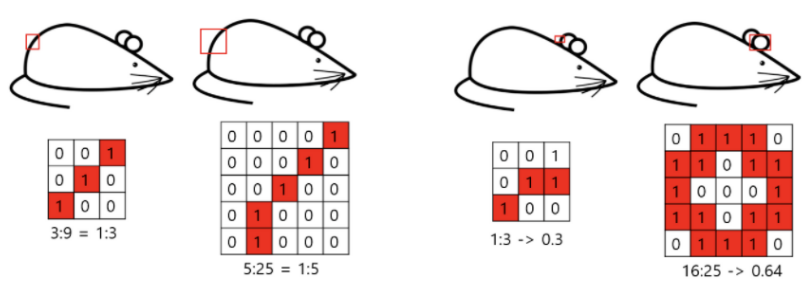

이미지의 몇몇 위치의 feature는 좀 더 넓은 영역의 Convolutional filter가 있어야 Correlated unit의 비율을 높일 수 있는 상황이 나타날 수 있다. <br> 위 그림에서 오른쪽의 경우가 그렇다. 따라서 feature map을 효과적으로 추출할 수 있도록 1×1, 3×3, 5×5 convolution 연산을 병렬적으로 수행한다.

* 사진 출처: https://phil-baek.tistory.com/entry/3-GoogLeNet-Going-deeper-with-convolutions-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0

네트워크의 크기를 무작정 늘리면 overfitting 현상과 많은 resource를 요구하므로 네트워크를 sparse하게 구성하여 크기를 증가시켰다. <br> 
단, sparse한 structure는 하드웨어 계산에서 비효율적이므로 sparse structure를 다시 dense한 component들로 구성한다. <br>
기본 Inception module의 구조는 다음과 같다.

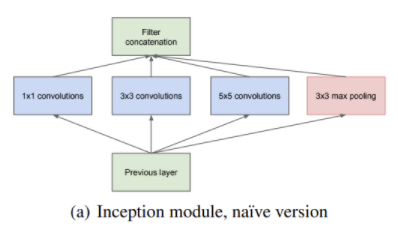


하지만 층이 깊어질 수록 channel의 수는 증가하고, 1×1, 3×3, 5×5 filter도 증가하면서 연산량이 급격하게 많아진다. <br>
이때 연산량을 유지하기 위해서 논문에서는 1×1 Conv 연산을 통해 channel을 줄였다.

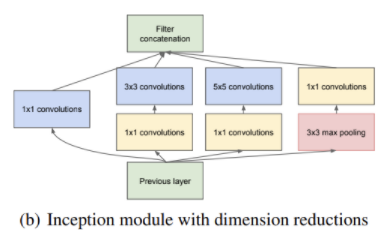

또한 Google 팀은 효율적인 메모리 사용을 위해 **낮은 layer에서는 기본적인 CNN 모델을 적용하고, 높은 layer에서는 Inception module을 사용했다.** <br>


<h3> <strong> 6. GoogLeNet </strong> </h3>

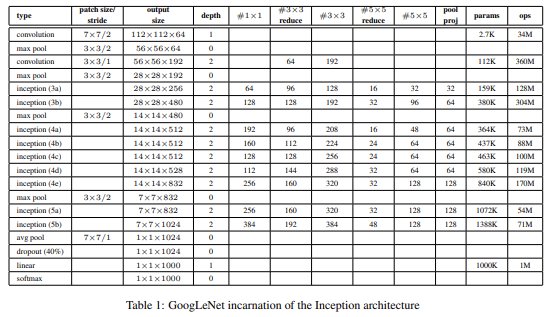

GoogLeNet의 구조는 위와 같으며 크게 4가지 구조로 나눌 수 있다.

**First Structure**

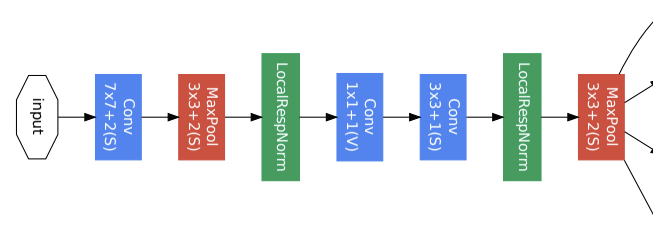

이전에 말했던 것처럼 **낮은 layer에서는 기본적인 CNN 모델을 적용**한 것을 확인할 수 있다.

**Second Structure**

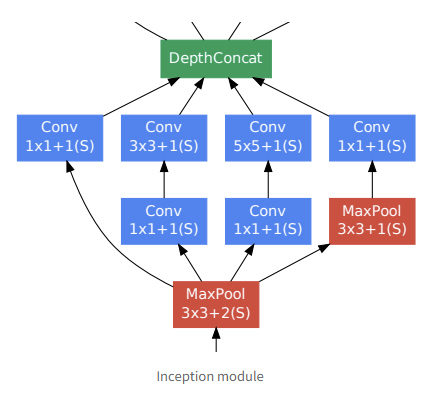

기본적인 Inception module이다. <br>
다양한 특징을 추출하기 위해서 1×1, 3×3, 5×5 Convolution을 수행한다.

**Third Structure**

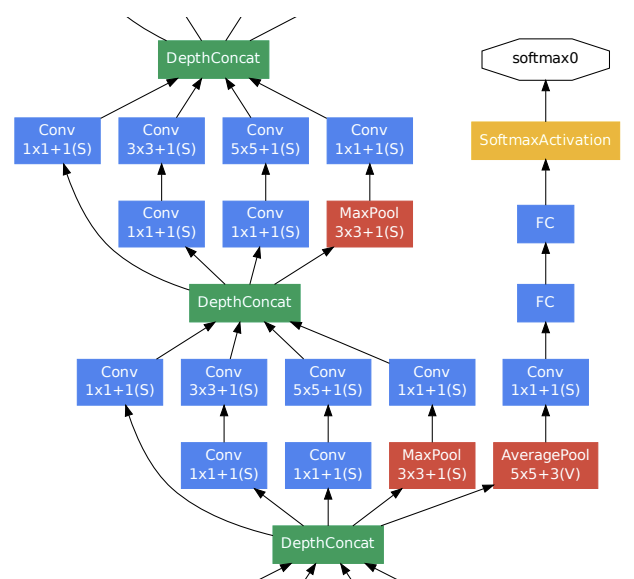

층이 깊어지면 gradient vanishing과 같은 문제가 발생하여 학습이 잘 되지 않는다. <br>
이를 방지하기 위해서 **auxiliary classifier**를 사용해 추가적인 역적파를 발생시켜 낮은 layer에도 gradient가 잘 전달되게 한다. 단, auxiliary classifier의 영향을 줄이기 위해 해당 classifier의 loss에는 0.3을 곱했고 실제 테스트에는 auxiliary classifier를 제거하고 last layer의 softmax만을 사용했다고 한다.

**Forth(Last) layer**

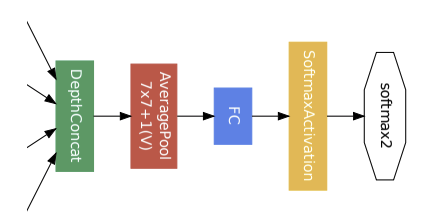

마지막 layer에서는 모든 layer를 거쳐 출력된 feature map을 AveragePool을 이용해 1차원 벡터로 만들어주고 softmax에 넘겨준다. 

이전 CNN Model들은 FC layer를 사용했지만 위처럼 AveragePool을 사용하면 가중치를 줄일 수 있다. <br>
실제로 AveragePool은 feature map의 모든 값의 평균을 구하면 되므로 학습할 가중치가 1개도 필요하지 않다.

<h3> <strong> 7. Training Methodology </strong> </h3>

* optimizer: Stochastic gradient descent
* momentum: 0.9
* learning rate: each 8 epochs -> reduce 4%
